In [136]:
import numpy as np
from sympy import symbols, diff, sin, cos, exp
from sympy import lambdify
import matplotlib.pyplot as plt

### P1

(a)  Polynomial and Sine Wave
$$f(x)=x^2-10\sin(2x)$$

(b) Basic Damped Oscillator
$$f(x)=e^{-0.2x^2}\cos(4x)$$

(c) Cubic Function with Sine Perturbation
$$f(x)=x^3-0.5x+\sin(3x)$$

(d) Alternating Peaks
$$f(x)=\sin(x)+\cos(2x)$$

(e) Parabola with Cosine Modulation
$$f(x)=(x-2)^2\cos(3x)$$

### P2 
completed

### P3
Implement a gradient descent method and test it by finding some minima of the functions prepared in Task 1. Experiment with different step lengths. Show some example descents and the areas of convergence to different extrema of the chosen functions.

In [137]:
x = symbols('x')

f1 = x**2 - 10 * sin(2*x)
f2 = exp(-0.2 * x**2) * cos(4*x)
f3 = x**3 - 0.5 * x + sin(3*x)
f5 = (x - 2)**2 * cos(3*x)
f4 = sin(x) + cos(2*x)

df1 = diff(f1, x)
df2 = diff(f2, x)
df3 = diff(f3, x)
df4 = diff(f4, x)
df5 = diff(f5, x)

num_f1 = lambdify(x, f1)
num_df1 = lambdify(x, df1)
num_f2 = lambdify(x, f2)
num_df2 = lambdify(x, df2)
num_f3 = lambdify(x, f3)
num_df3 = lambdify(x, df3)
num_f4 = lambdify(x, f4)
num_df4 = lambdify(x, df4)
num_f5 = lambdify(x, f5)
num_df5 = lambdify(x, df5)


In [138]:
def gradient_descent(df, x0, learning_rate, max_iters=100):
    x = x0
    trajectory = [x]
    for i in range(max_iters):
        grad = df(x)
        x -= learning_rate * grad
        trajectory.append(x)
        if abs(grad) < 1e-6:
            break
    return x, trajectory

In [143]:
def plot(gradient_descent_func, initial_points, step_sizes):
    functions = [num_f1, num_f2, num_f3, num_f4, num_f5]
    derivatives = [num_df1, num_df2, num_df3, num_df4, num_df5]
    labels = ['f1', 'f2', 'f3', 'f4', 'f5']
    x_ranges = [(-3, 3), (-3, 3), (-3, 3), (-3, 3), (-3, 3)]

    for _, (f, df, x0, lr, label, x_range) in enumerate(zip(functions, derivatives, initial_points, step_sizes, labels, x_ranges)):
        final_x, trajectory = gradient_descent_func(df, x0, lr)
        print("final x value:", final_x)
        x_vals = np.linspace(x_range[0], x_range[1], 400)
        y_vals = f(x_vals)

        plt.figure(figsize=(8, 4))
        plt.plot(x_vals, y_vals, label=label)
        plt.scatter(trajectory, [f(t) for t in trajectory], color='red', label='Trajectory')
        plt.title(f"{gradient_descent_func.__name__} on {label}")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()


final x value: 0.7479649445217313


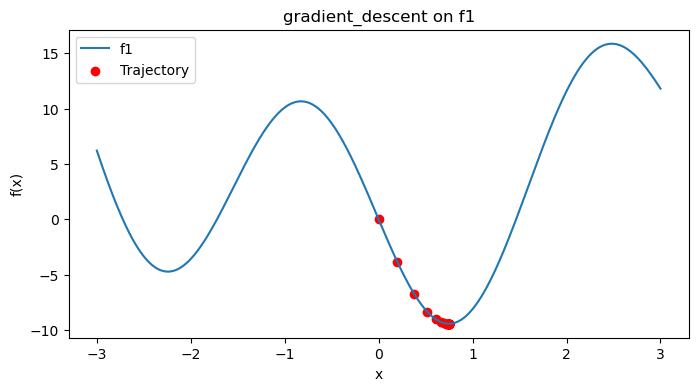

final x value: 0.0


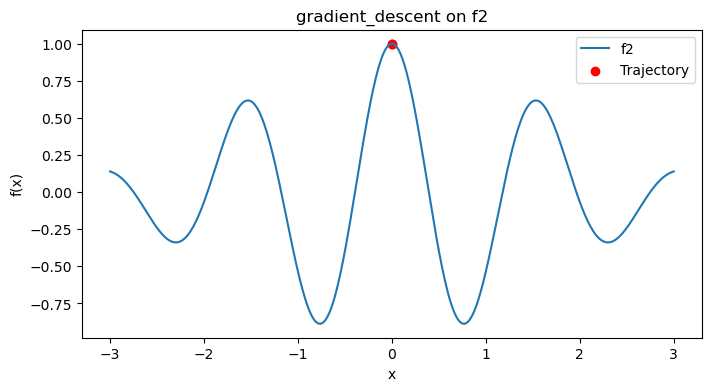

final x value: -0.5787594411721981


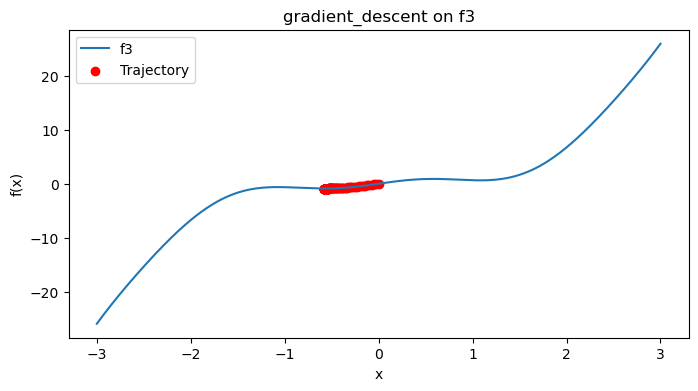

final x value: -1.5268065143093899


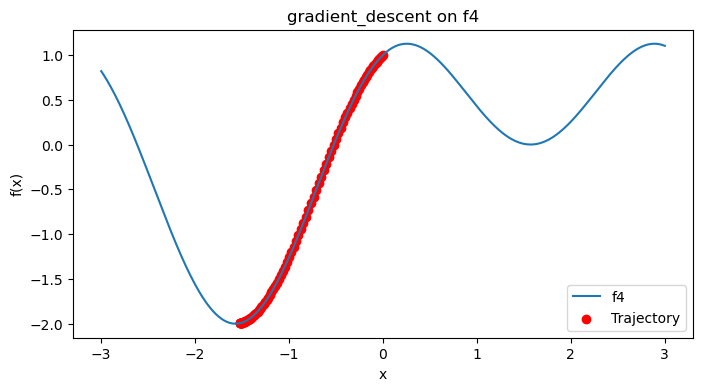

final x value: 2.0


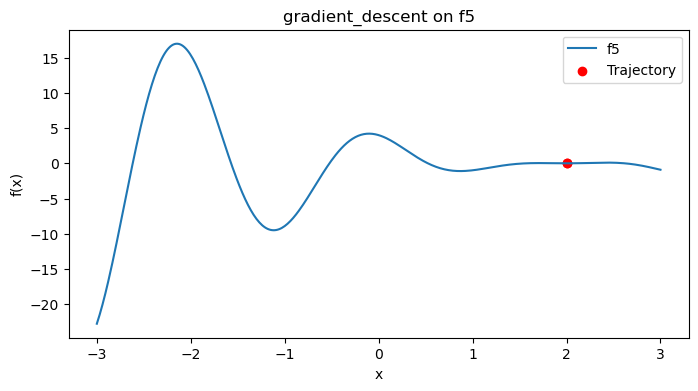

In [144]:
initial_points = [0, 0, 0, 0, 2]
step_sizes = [0.01, 0.01, 0.01, 0.01, 0.01]
plot(gradient_descent, initial_points, step_sizes)

### P4
Add momentum to your gradient descent and see if it changed the areas of convergence fromthe previous task.
https://towardsdatascience.com/gradient-descent-with-momentum-59420f626c8f

In [147]:
def gradient_descent_momentum(df, x0, learning_rate, momentum=0.9, max_iters=100):
    x = x0
    v = 0 
    trajectory = [x]
    for _ in range(max_iters):
        grad = df(x)
        v = momentum * v - learning_rate * grad  # Update velocity
        x += v 
        trajectory.append(x)
        if abs(grad) < 1e-6:
            break
    return x, trajectory


final x value: 0.7503377890465269


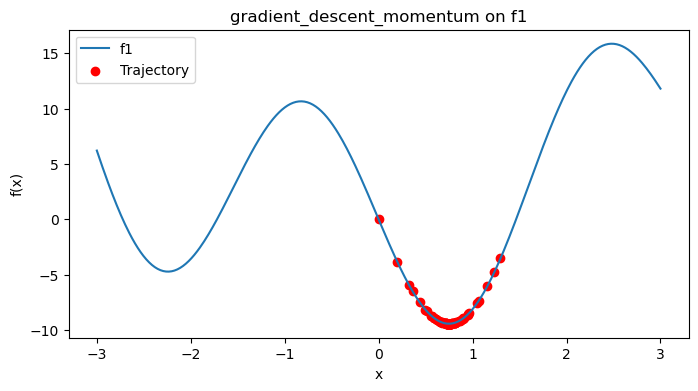

final x value: 0.0


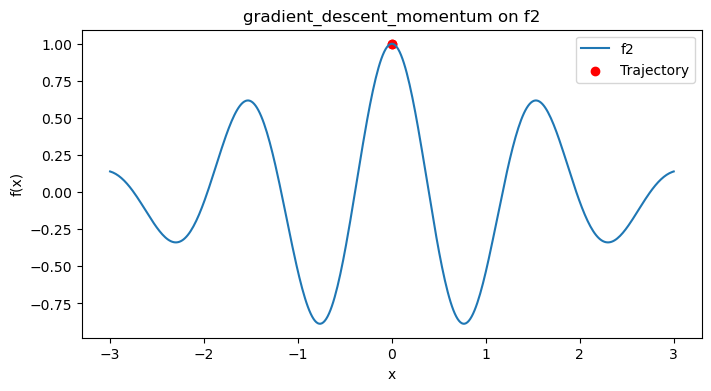

final x value: -0.5843058875632835


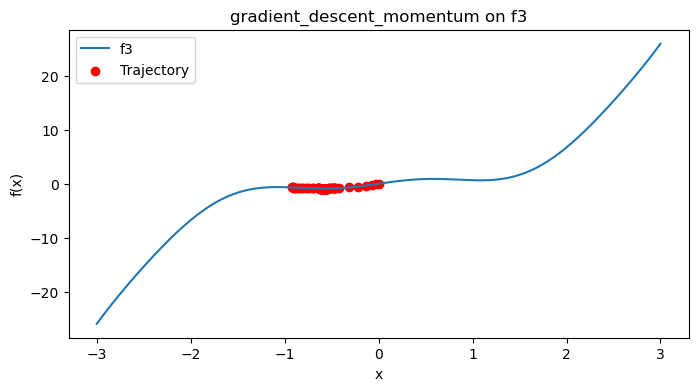

final x value: -1.5676821443358568


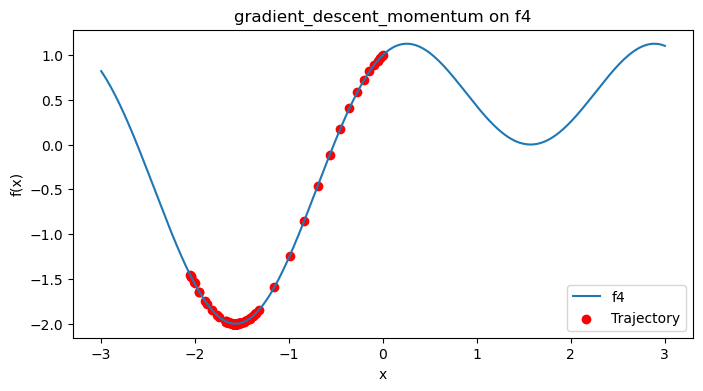

final x value: 3.310508221269106


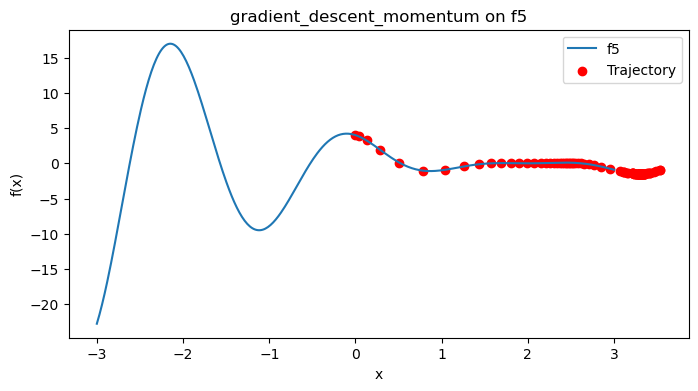

In [148]:
initial_points = [0, 0, 0, 0, 0]
step_sizes = [0.01, 0.01, 0.01, 0.01, 0.01] 
plot(gradient_descent_momentum, initial_points, step_sizes)